In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tweepy
import twitter_credentials as credentials

In [2]:
def plot_pol_sub(polarity, subjectivity, title):
    plt.figure(figsize=(14,7))
    for i in range(0, len(polarity)):
        plt.scatter(polarity[i], subjectivity[i], color='blue')

    plt.grid()
    plt.title(title)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    
    plt.show()

In [3]:
# client initialization
client = tweepy.Client(bearer_token=credentials.BEARER_TOKEN,
                       consumer_key=credentials.CONSUMER_KEY,
                       consumer_secret=credentials.CONSUMER_SECRET,
                       access_token=credentials.ACCESS_TOKEN,
                       access_token_secret=credentials.ACCESS_TOKEN_SECRET)




In [6]:
df = pd.read_csv('musk_twitter_100k.csv')

title = '#ElonMusk AND Twitter'

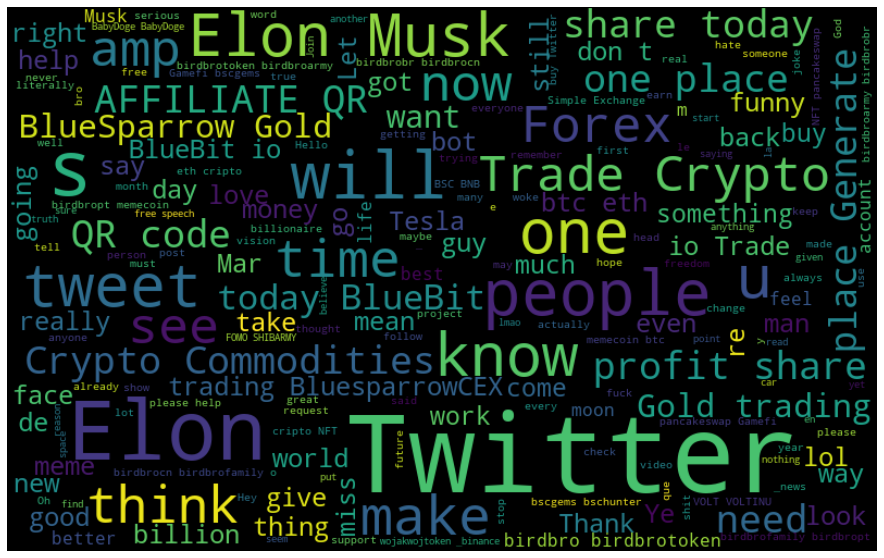

In [4]:
#wordcloud
all_words = ' '.join([tweets for tweets in df['clean_text']])
word_cloud = WordCloud(width=800, height=500, random_state=1337, max_font_size=100).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

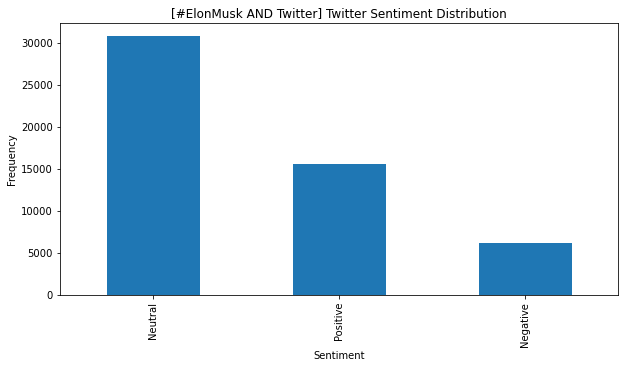

In [10]:
#barchart
plot = df['sentiment'].value_counts().plot(kind='bar', figsize=(10, 5), title=title + ' Twitter Sentiment Distribution')
plot.set_xlabel("Sentiment")
plot.set_ylabel("Frequency")
plt.show()

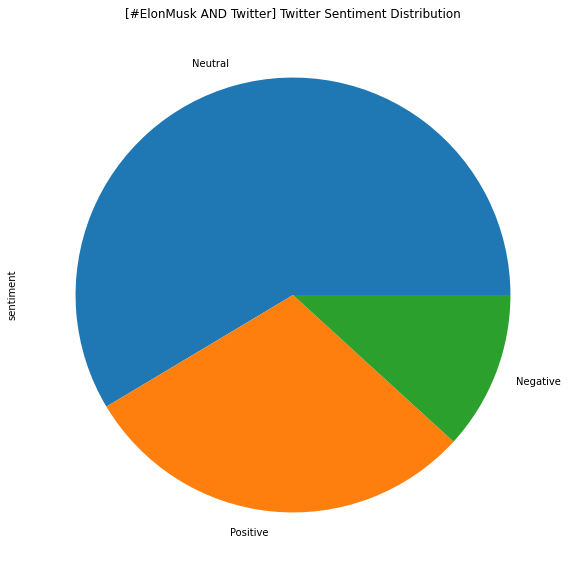

In [11]:
#piechart
plot = df['sentiment'].value_counts().plot.pie(y='sentiment', figsize=(10, 10), title=title + ' Twitter Sentiment Distribution')
plt.show()

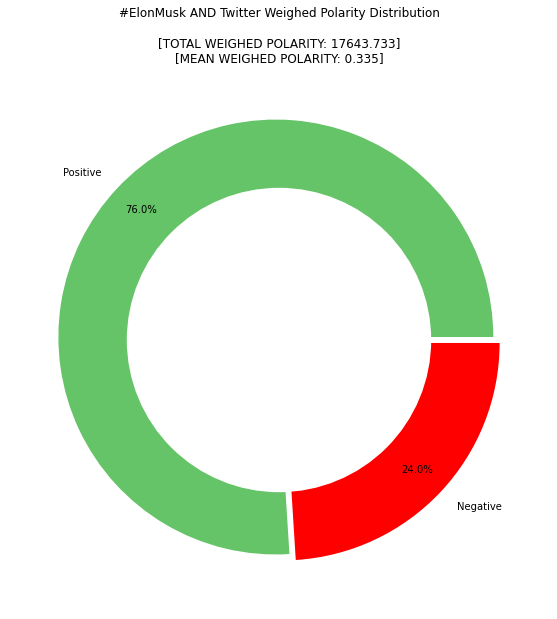

Response(data={'id': '1532697244092211202', 'text': '#ElonMusk AND Twitter\nTOTAL WEIGHED POLARITY: 17643.733\nMEAN WEIGHED POLARITY: 0.335'}, includes={}, errors=[], meta={})

In [7]:
#Donut chart
positive = df[df['weighed_polarity']>0]['weighed_polarity'].sum()
negative = df[df['weighed_polarity']<0]['weighed_polarity'].sum() * (-1)

colors = ['#65c368', '#FF0000']

gaps = (0.02, 0.02)

fig = plt.figure(figsize=(10,10))

  
plt.pie([positive, negative], colors=colors, labels=['Positive', 'Negative'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=gaps)
  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title(title + ' Weighed Polarity Distribution\n\n' +
          '[TOTAL WEIGHED POLARITY: ' + str(round((positive-negative), 3)) + ']\n' +
          '[MEAN WEIGHED POLARITY: ' + str(round((positive-negative)/df.shape[0], 3)) + ']')
plt.show()

text = '#ElonMusk AND Twitter\n' + \
       'TOTAL WEIGHED POLARITY: ' + str(round((positive-negative), 3)) + '\n' + \
       'MEAN WEIGHED POLARITY: ' + str(round((positive-negative)/df.shape[0], 3))

client.create_tweet(text=text)

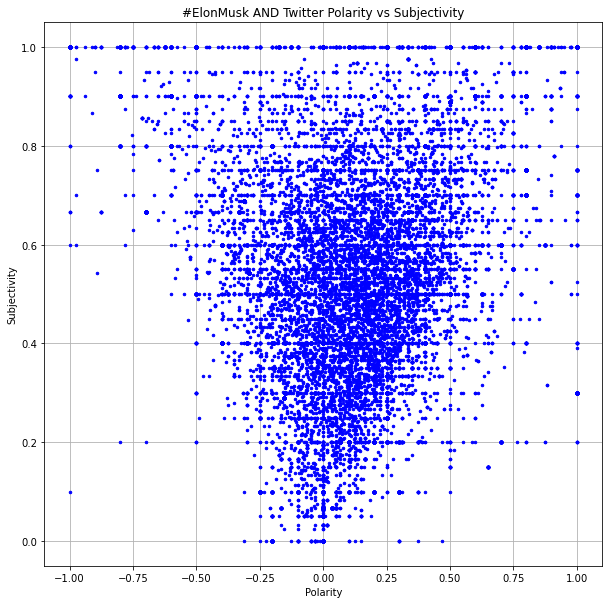

In [8]:
#scatter plot
x = df['polarity'].tolist()
y = df['subjectivity'].tolist()

plt.figure(figsize=(10,10))

plt.title(title + ' Polarity vs Subjectivity')
plt.plot(x, y, 'b.', markersize=5)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

<AxesSubplot:>

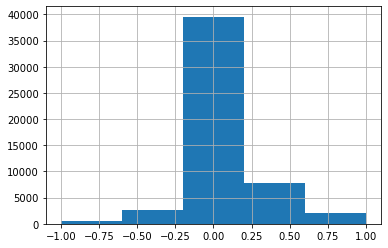

In [13]:
df['polarity'].hist(bins=5)

In [18]:
df.head()

95957867

In [45]:
df[df['weighed_polarity'] < 0 ]['weighed_polarity'].sum()

-53.50316982559534